### 1. 決策樹中的 Overfitting

**Overfitting** 是指機器學習模型在訓練數據上表現非常好，但在測試數據或未知數據上表現不佳的情況。這通常是因為模型過於複雜，捕捉到了訓練數據中的噪音或特異點，而不是學習到了數據的真正模式。

在 **tree-based models**（如決策樹、隨機森林和梯度提升樹）中，overfitting 特別容易發生，因為這些模型可以反覆地分割數據以達到極高的訓練精度。決策樹模型尤其容易 overfit，因為它們會不停地分裂直到每個葉節點都是純淨的，這導致模型在訓練數據上幾乎沒有誤差，但在新數據上表現不佳。


### 2. Tree-based Model 的 Overfitting 解法


#### 模型面的解法

- 為了解決 tree-based models 中的 overfitting 問題，可以從以下幾個模型層面著手：

1. **剪枝 (Pruning)**：在構建決策樹時，預先設置最大深度（max depth）或最小樣本數（min samples）等參數來限制樹的成長。這可以減少樹的複雜度，防止其過度擬合訓練數據。

2. **集成方法 (Ensemble Methods)**：
   - **隨機森林 (Random Forest)**：通過訓練多棵決策樹並取平均值或多數決來做出預測，隨機森林可以降低單一決策樹的過度擬合風險。
   - **梯度提升樹 (Gradient Boosting Trees)**：這是一種逐步構建樹的方法，每次都試圖修正之前樹的錯誤。通過適當的正則化技術（如縮放步長和設置最大樹深），可以減少 overfitting。

### 3. 資料面的解法

1. **增加數據量 (Increase Data Volume)**：更多的訓練數據可以幫助模型學習更一般化的模式，而不是只針對訓練數據中的特定特徵。

2. **特徵選擇 (Feature Selection)**：移除不相關或冗餘的特徵，減少模型的複雜度，使其更容易泛化。

3. **數據增強 (Data Augmentation)**：通過創建新的數據樣本來增加數據集的多樣性，例如通過添加噪音或進行隨機變換。

4. **交叉驗證 (Cross-Validation)**：使用交叉驗證技術來評估模型的表現，確保模型在不同的數據子集上都能表現良好。

### 剪枝(Purning)

🌳 預剪枝 (Pre-Pruning) 指在決策樹的構建過程中，對每個節點在劃分前需根據不同標準進行截枝。

🪚 後剪枝 (Post-Pruning) 可以為了防止過度擬合，通過後剪枝方法來簡化決策樹結構，提升模型的泛化能力。

🌲 剪枝策略 包括預剪枝和後剪枝，以對抗過度擬合，使決策樹更具解釋性

- [延伸閱讀](https://medium.com/@whchang022/%E6%B1%BA%E7%AD%96%E6%A8%B9-decision-tree-%E5%AD%B8%E7%BF%92%E7%AD%86%E8%A8%98-e763c5c5b933)

Accuracy: 1.00


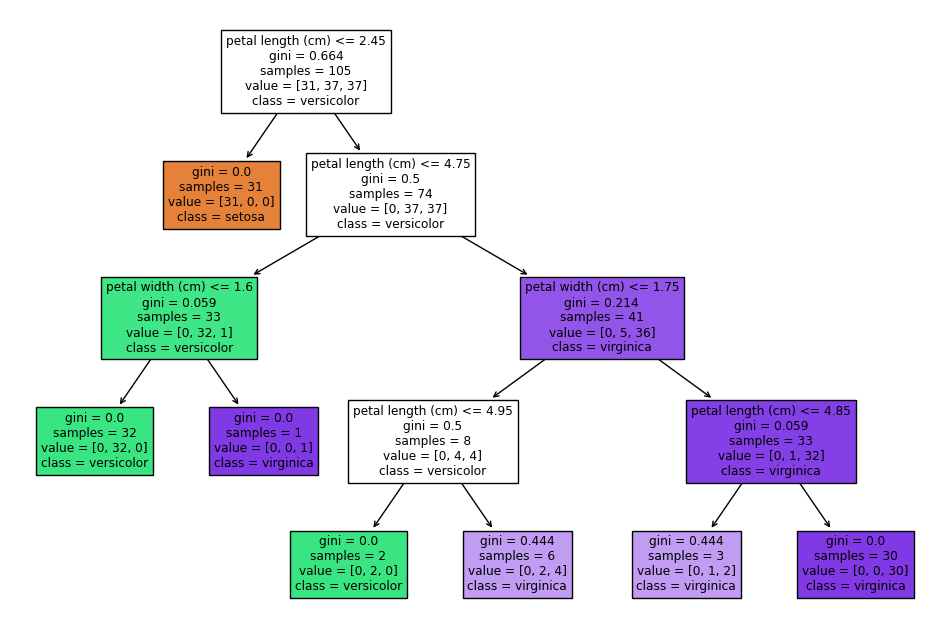

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [8]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# 加載數據集
iris = load_iris()
X, y = iris.data, iris.target

# 分割數據集為訓練集和測試集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 創建決策樹分類器，並設置預剪枝參數，這邊的參數可以自己調看看
clf = DecisionTreeClassifier(max_depth=4, min_samples_split=3, random_state=42)

# 訓練模型
clf.fit(X_train, y_train)

# 預測
y_pred = clf.predict(X_test)

# 評估模型
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
plot_tree(clf, filled=True, feature_names=iris.feature_names, class_names=iris.target_names)
plt.show()
print(iris.feature_names)

max_leaf_nodes：限制葉子節點的最大數量。這可以限制樹的複雜度。

min_samples_leaf：一個葉子節點所需的最小樣本數。這有助於防止樹過於稠密。

## 隨機森林（Random Forest）
隨機森林（Random Forest）是一種集成學習方法，主要用於分類和回歸任務。它由多棵決策樹組成，通過綜合多棵樹的預測結果來提高模型的穩定性和準確性。隨機森林由 Leo Breiman 和 Adele Cutler 在 2001 年提出，是目前最受歡迎和強大的機器學習算法之一。

### 隨機森林的工作原理

1. **Bootstrap 采樣**：從原始訓練數據集中有放回地隨機抽取多個樣本集（即 Bootstrap 采樣），每個樣本集用於訓練一棵決策樹。這些樣本集之間會有重複的數據點。

2. **隨機特徵選擇**：在每棵決策樹的每個節點分裂時，隨機選擇一部分特徵進行分裂，而不是使用所有特徵。這種隨機性使得各個決策樹之間存在差異，從而提高了模型的泛化能力。

3. **決策樹訓練**：對每個樣本集，訓練一棵決策樹。每棵樹可以生長到最大程度（即不進行剪枝），或者根據設置的參數進行預剪枝（如設置最大深度、最小樣本數等）。

4. **綜合預測**：對於分類任務，隨機森林通過投票機制來決定最終的分類結果（即多數決）。對於回歸任務，隨機森林取所有決策樹預測值的平均值作為最終結果。

### 優點

- **高準確性**：隨機森林通常具有很高的準確性，因為它綜合了多棵決策樹的預測結果，減少了單一模型的過擬合風險。
- **抗過擬合**：通過隨機采樣和隨機特徵選擇，隨機森林有效地防止了過擬合。
- **穩定性**：隨機森林對於異常值和噪聲數據具有很好的穩定性，因為這些異常值和噪聲在多個決策樹中的影響會被平均化。
- **特徵重要性**：隨機森林可以計算每個特徵的重要性，幫助我們理解哪些特徵對預測結果影響最大。

### 缺點

- **計算成本高**：訓練多棵決策樹需要較高的計算資源和時間，尤其在數據集較大時。
- **解釋性差**：雖然可以計算特徵重要性，但隨機森林作為一個集成模型，單個決策樹的解釋性較弱。


- [延伸閱讀 Bootstrap](https://medium.com/chung-yi/ml%E5%85%A5%E9%96%80-%E5%8D%81%E4%B8%83-%E9%9A%A8%E6%A9%9F%E6%A3%AE%E6%9E%97-random-forest-6afc24871857)

Accuracy: 1.00


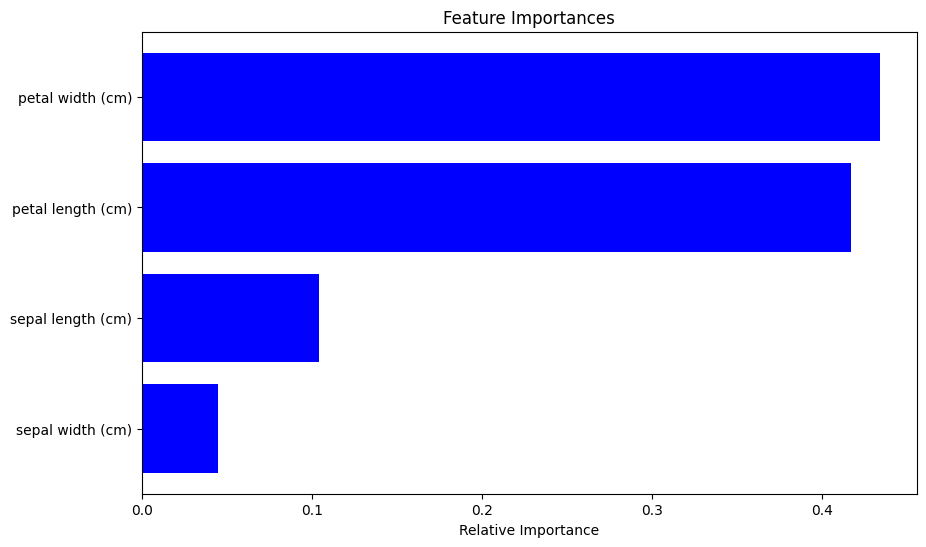

In [4]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# 加載數據集
iris = load_iris()
X, y = iris.data, iris.target

# 分割數據集為訓練集和測試集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 創建隨機森林分類器，並設置一些常見的參數
clf = RandomForestClassifier(
    n_estimators=100,        # 樹的數量
    random_state=42
)


# 訓練模型
clf.fit(X_train, y_train)

# 預測
y_pred = clf.predict(X_test)

# 評估模型
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# 可視化特徵重要性（可選）
import matplotlib.pyplot as plt
import numpy as np

features = iris.feature_names
importances = clf.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(10, 6))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()


Mean Squared Error: 0.26
R^2 Score: 0.80


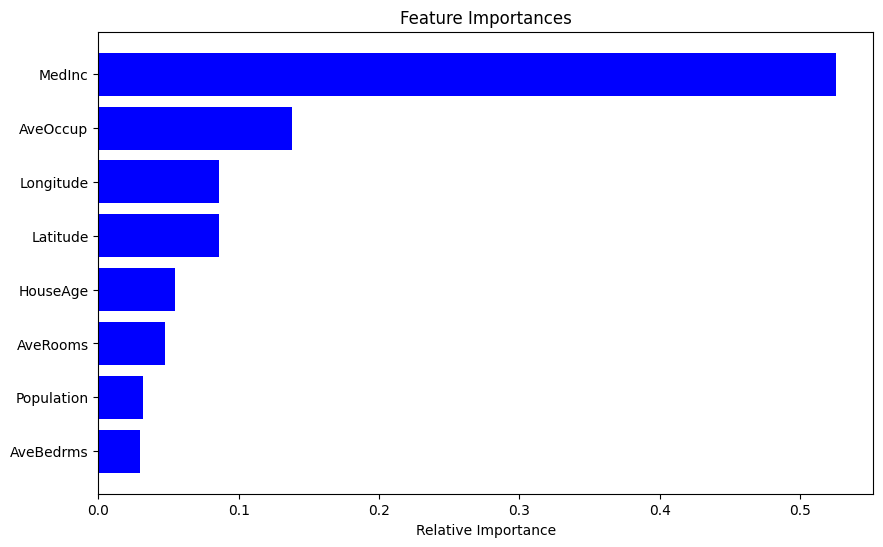

In [7]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# 加載數據集
california_housing = fetch_california_housing()
X, y = california_housing.data, california_housing.target

# 分割數據集為訓練集和測試集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 創建隨機森林回歸器，並設置一些常見的參數
regressor = RandomForestRegressor(
    n_estimators=100,        # 樹的數量
    random_state=42
)

# 訓練模型
regressor.fit(X_train, y_train)

# 預測
y_pred = regressor.predict(X_test)

# 評估模型
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse:.2f}")
print(f"R^2 Score: {r2:.2f}")

# 可視化特徵重要性（可選）
import matplotlib.pyplot as plt
import numpy as np

features = california_housing.feature_names
importances = regressor.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(10, 6))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()
